In [327]:
import matplotlib.pyplot as plt
import random as rd

In [328]:
class Vertex:
    def __init__ (self, x, y):
        self.x = x
        self.y = y 
        
    def __str__(self):
        return f"(x:{self.x}, y:{self.y})"
    
    def __repr__(self):
        return f"(x:{self.x}, y:{self.y})"
        
    def __eq__(self, other):
        if(self.y == other.y and self.x == other.x):
            return True
        
    def __lt__(self, other):
        if(self.y<other.y):
            return True
        elif(self.y==other.y):
            if (self.x < other.x):
                return True
        else:
            return False
        
    def __lt__(self, other):
        if(self.y>other.y):
            return True
        elif(self.y==other.y):
            if (self.x > other.x):
                return True
        else:
            return False
        

In [337]:
def generate_test_cases(n):
    izq = []
    der = []
    x1 = rd.randrange(0, 10, 1)
    y1 = rd.randrange(8, 12, 1)
    v1 = Vertex(x1,y1)
    izq.append(v1)
    der.append(v1)
    for i in range (n):
        x1 = rd.randrange(0, 10, 1)
        y1 = rd.randrange(0, 10, 1)
        v1 = Vertex(x1,y1)
        izq.append(v1)
        der.append(v1)
    return izq, der

print(generate_test_cases(4))

NameError: name 'test_list' is not defined

In [330]:
def plotTriang(diag):
    for i in diag:
        
        x = []
        y = []
        
        x1 = i[0].x
        x.append(x1)
        
        y1 = i[0].y
        y.append(y1)
        
        x2 = i[1].x
        x.append(x2)
        
        y2 = i[1].y
        y.append(y2)
        
        plt.plot(x , y , marker='o', linestyle ='-', label='Left Chain ')


In [331]:
def plotPoints(izq, der, diag):
    
    izqi = []
    dere = []
    
    for i in izq:
        izqi.append((i.x,i.y))
    
    for i in der:
        dere.append((i.x,i.y))
    
    left_x , left_y = zip (* izqi )
    right_x , right_y = zip (* dere )
    
    if(diag != None):
        plotTriang(diag)

    # Plot left_chain , right_chain
    plt.plot(left_x , left_y , marker='o', linestyle ='-', label='Left Chain ')
    plt.plot(right_x , right_y , marker='o', linestyle ='-', label='Right Chain')

    plt.xlabel('X-axis ')
    plt.ylabel('Y-axis ')
    plt.title('Cadenas deracha e izquierda ')
    plt.legend ()

    plt.show ()

In [332]:
def getMayor(verts):
    mayor = verts[0]
    for i in range(0, len(verts)-1):
        if (verts[i].y > mayor.y or verts[i].y == mayor.y and verts[i].x > mayor.x):
            mayor = verts[i]
    return mayor

In [333]:
def cross_p (v0 , v1 , v2):
    return (v2.x - v1.x) * (v0.y - v1.y) - (v0.x - v1.x) * (v2.y - v1.y)

In [334]:
def getIzDer(verts, mayor):
    i = verts.index(mayor)
    izq = verts[:i] 
    der = verts[i:] 
    der.pop()
    izq.sort(reverse=False) 
    der.sort(reverse=False) 
    return izq, der

In [335]:

def triangulacion(izq, der):
    
    diagonales = []
    u_list =sorted ( izq + der , key=lambda v: (-v.y, v.x))

    u_list = u_list [1: -2]
    stack=u_list [:2]
    for vertex in u_list [2:]:
        cond_l = vertex in izq and stack [-1] in izq
        cond_r = vertex in der and stack [-1] in der
        if cond_l and len(stack) >1:
            if cross_p (stack [-2], stack [-1], vertex) >0:
                diagonales.append (( stack [-2], vertex))
                stack.pop (-1)
            stack.append(vertex)
        elif cond_r and len(stack) >1:
            if cross_p (stack [-2], stack [-1], vertex) < 0:
                diagonales.append (( stack [-2], vertex))
                stack.pop (-1)
            stack.append(vertex)
        else:
            stack.pop (0)
            while len(stack) >1:
                diagonales.append (( vertex , stack [0]))
                stack.pop (0)
            diagonales.append (( vertex , stack [0]))
            stack.append(vertex)
    return diagonales
        

[((x:7, y:4), (x:2, y:5)), ((x:1, y:2), (x:7, y:4)), ((x:5, y:2), (x:1, y:2))]


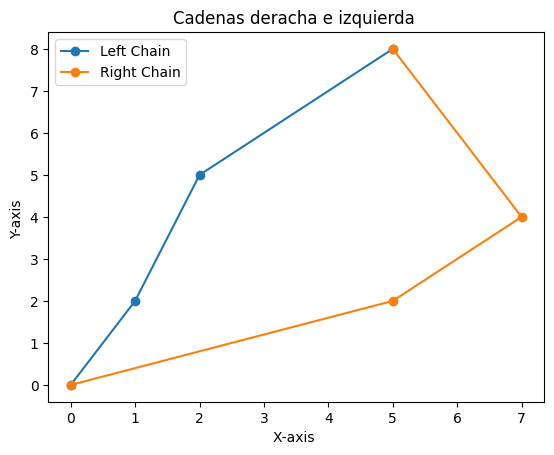

In [336]:
izq = [Vertex(5, 8), Vertex(2, 5), Vertex(1, 2), Vertex(0, 0)]
der = [Vertex(5, 8), Vertex(7, 4), Vertex(5, 2) ,Vertex(0,0)]

diagonales = triangulacion(izq, der)
plotPoints(izq, der, None)